<a href="https://colab.research.google.com/github/Ashupathak2001/oibsip_5/blob/main/Car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.describe().style.background_gradient(cmap='summer')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
# corelation matrix
corr=df.corr().style.background_gradient(cmap='winter')
corr

<ipython-input-10-fc9826330824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().style.background_gradient(cmap='winter')


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-41541c185c6e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='rainbow')


<Axes: >

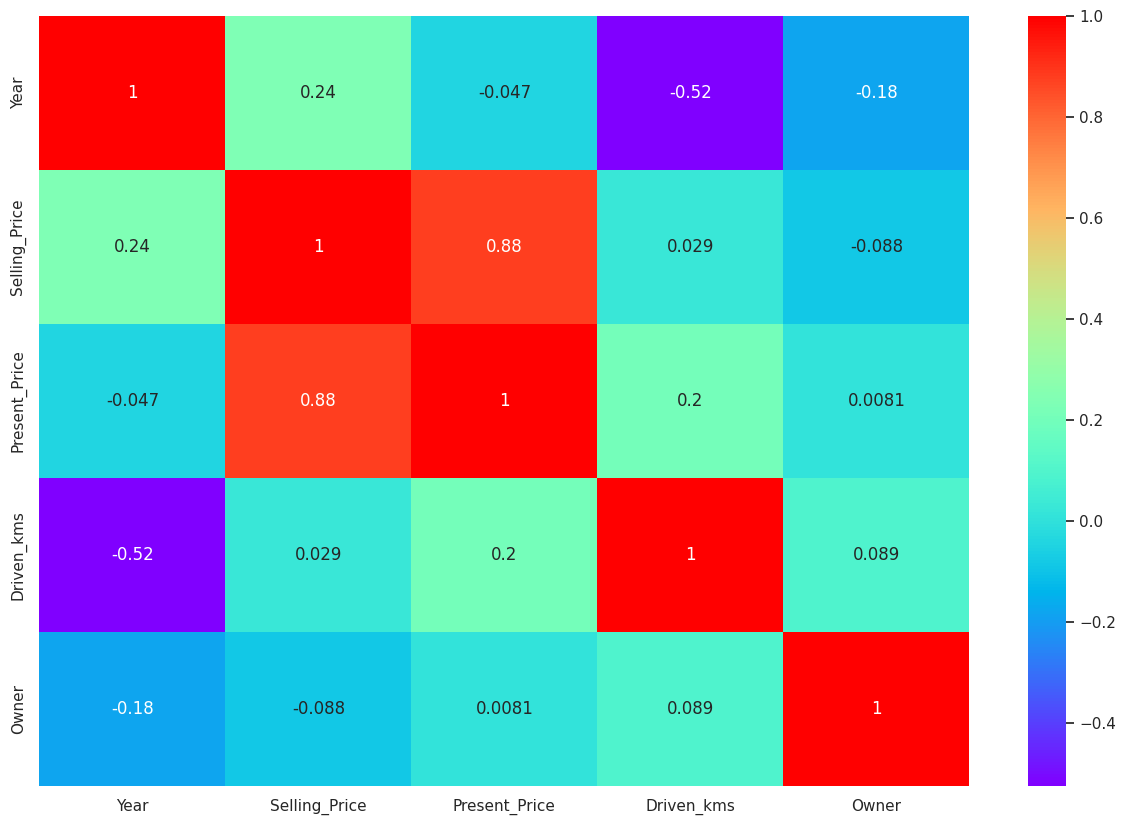

In [ ]:
# let's visualize the correlation matrix in the seaborn
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

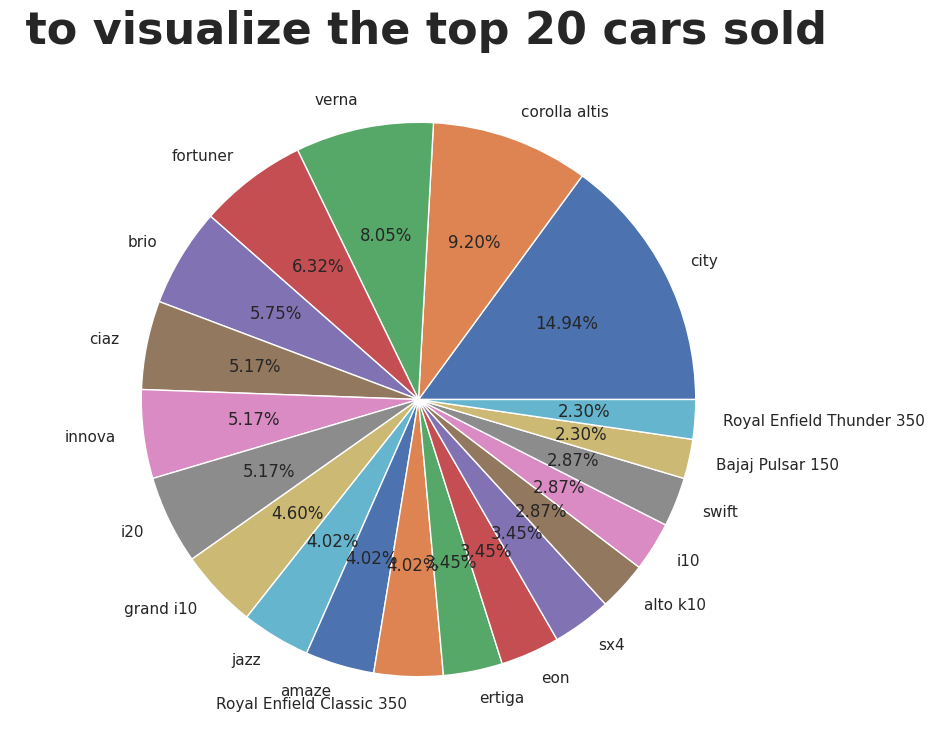

In [ ]:
# explore data analysis
car_name=df['Car_Name'].value_counts()
label=['city','corolla altis','verna','fortuner','brio','ciaz','innova','i20','grand i10','jazz','amaze','Royal Enfield Classic 350','ertiga','eon','sx4','alto k10','i10','swift','Bajaj Pulsar 150','Royal Enfield Thunder 350']
plt.figure(figsize=(18,9))
plt.pie(car_name[:20],labels=label,autopct='%1.2f%%')
plt.title(" to visualize the top 20 cars sold",fontsize=32,fontweight='bold')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

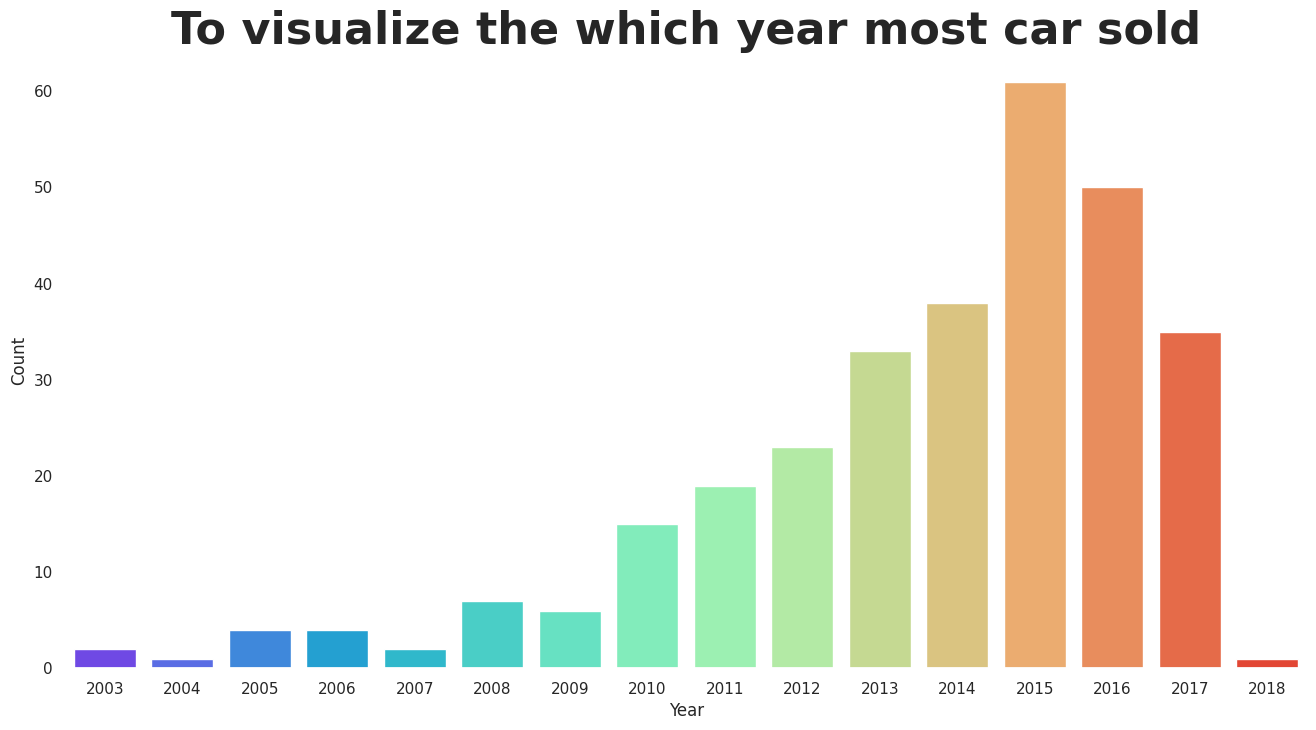

In [ ]:
# to visualize the year in the dataset
year=df['Year'].value_counts()
#to visualize the year in the seaborn barplot
ax=plt.axes()
#set the background color
ax.set(facecolor='white')
#set the figures size
sns.set(rc={'figure.figsize':(16,8)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the which year most car sold",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.barplot(x=year.index,y=year,palette='rainbow')
#on the x axis
plt.xlabel("Year")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

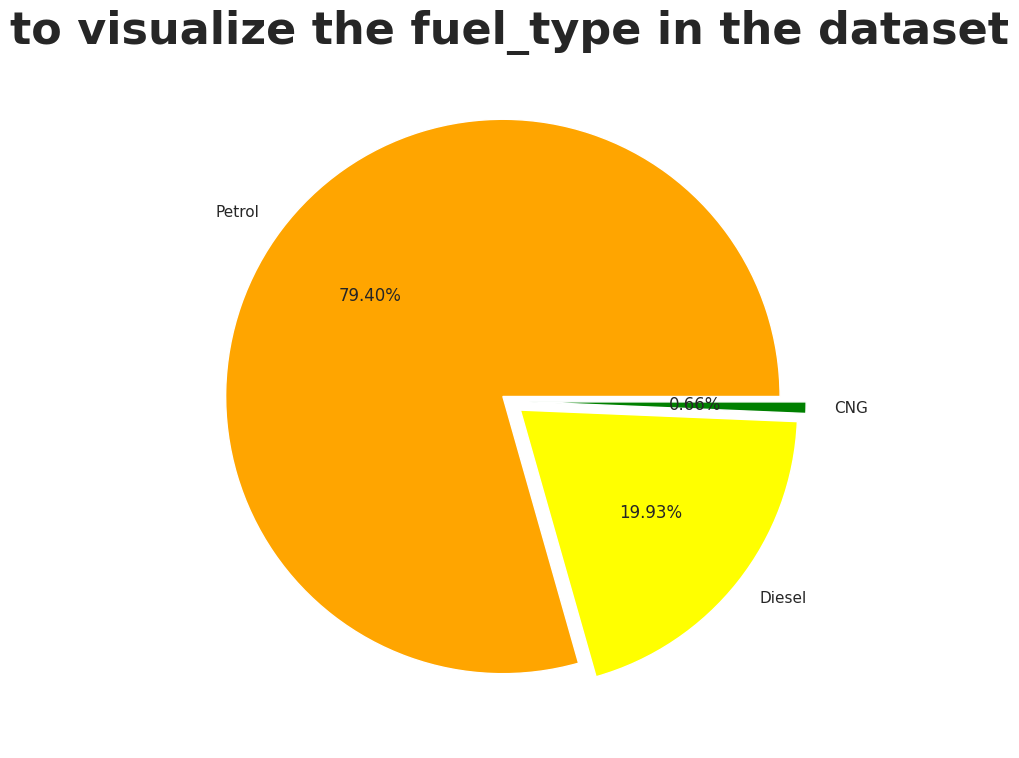

In [ ]:
# to visualize fuel type in dataset
fuel_type=df['Fuel_Type'].value_counts()
label=['Petrol','Diesel','CNG']
plt.figure(figsize=(16,9))
plt.pie(fuel_type,labels=label,autopct='%1.2f%%',explode=[0.03,0.05,0.07],colors=['orange','yellow','green'])
plt.title("to visualize the fuel_type in the dataset",fontsize=32,fontweight='bold')
plt.show()

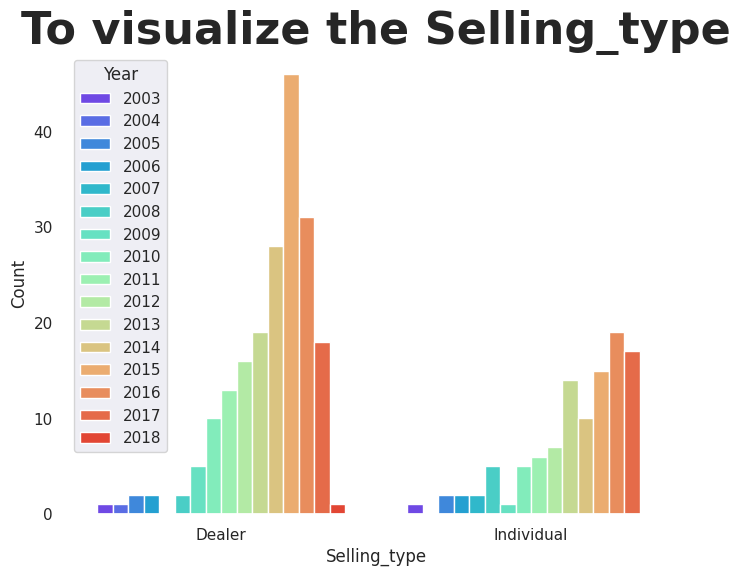

In [ ]:
#to visualize the year in the seaborn countplot
ax=plt.axes()
#set the background color
ax.set(facecolor='white')
#set the figures size
sns.set(rc={'figure.figsize':(8,6)},style='darkgrid')
#set the title of the plot
ax.set_title("To visualize the Selling_type",fontsize=32,fontweight=900)
#let's visualize the barplot
sns.countplot(data=df, x='Selling_type', hue='Year', palette='rainbow')
#on the x axis
plt.xlabel("Selling_type")
#on the y_axis
plt.ylabel("Count")
#let's visualize the image
plt.show()

<ipython-input-23-fe35bf5fd5cd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Selling_Price'],fit=norm,kde=False,color='gray')


<Axes: xlabel='Selling_Price'>

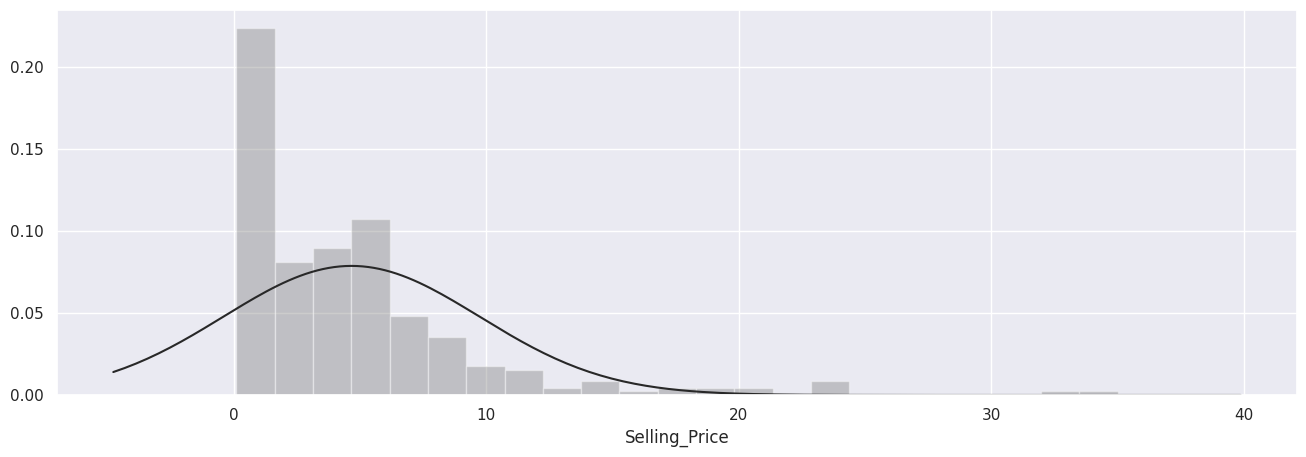

In [ ]:
from scipy.stats import norm
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Selling_Price in the dataset
sns.distplot(df['Selling_Price'],fit=norm,kde=False,color='gray')

<ipython-input-24-a2eabb7cb9a5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Present_Price'],fit=norm,kde=False,color='blue')


<Axes: xlabel='Present_Price'>

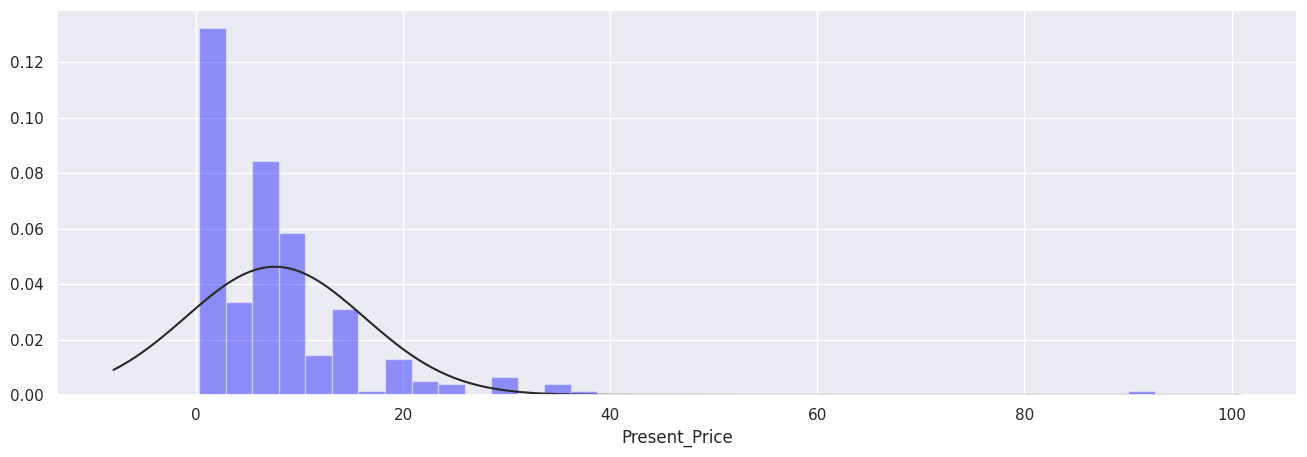

In [ ]:
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
#to visualize the Present_Price in the dataset
sns.distplot(df['Present_Price'],fit=norm,kde=False,color='blue')

In [ ]:
# let's check the car model with selling price
car_selling_price=df[['Car_Name','Selling_Price']].groupby(['Car_Name','Selling_Price']).sum().reset_index().sort_values(by='Selling_Price',ascending=False)
import plotly.express as px
fig=px.histogram(car_selling_price,x='Car_Name',y='Selling_Price',title="to visualize the car model with selling price")
fig.update_layout(bargap=0.2,bargroupgap=0.1,plot_bgcolor='black')
fig.show()

In [ ]:
#Let's visualize the scatter plot
fig=px.scatter(df,y='Selling_Price',x='Present_Price')
fig.update_layout(bargap=0.2,bargroupgap=0.1,
    plot_bgcolor='gray')
fig.show()

<Axes: xlabel='Fuel_Type', ylabel='Present_Price'>

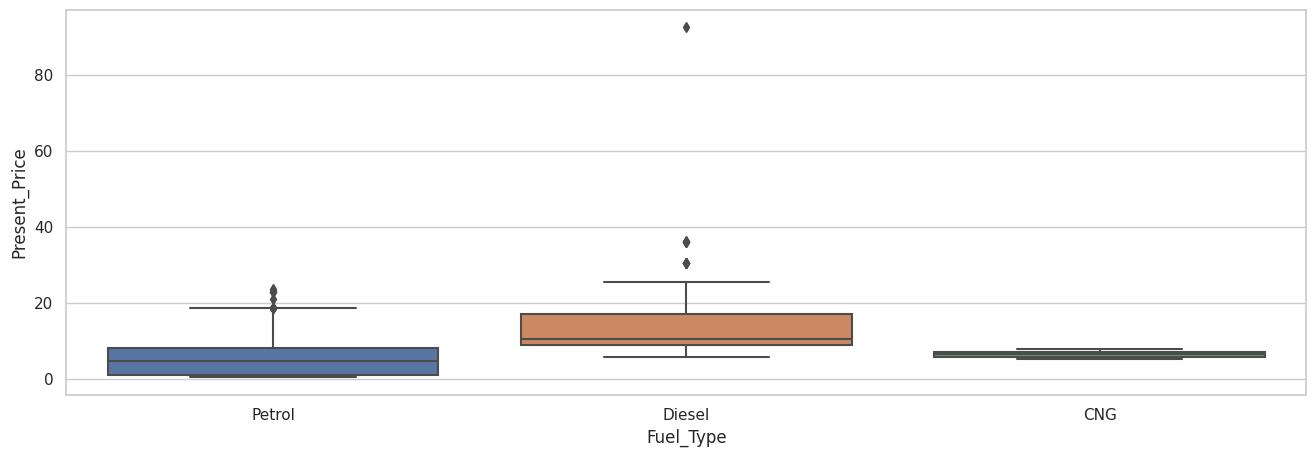

In [ ]:
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Fuel_Type', data = df)

<Axes: xlabel='Selling_type', ylabel='Present_Price'>

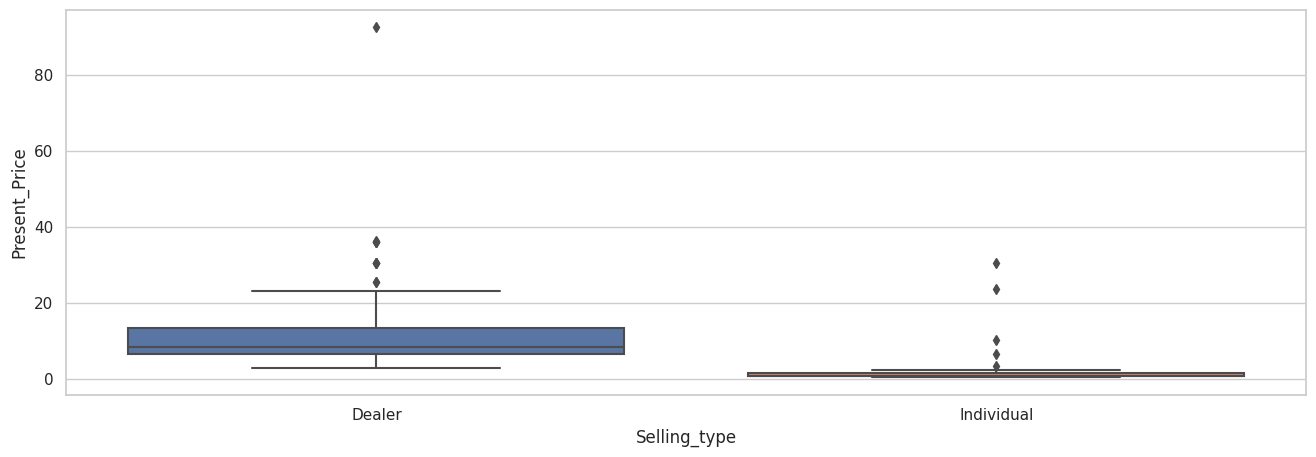

In [ ]:
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Present_Price', x = 'Selling_type', data = df)

<Axes: xlabel='Transmission', ylabel='Selling_Price'>

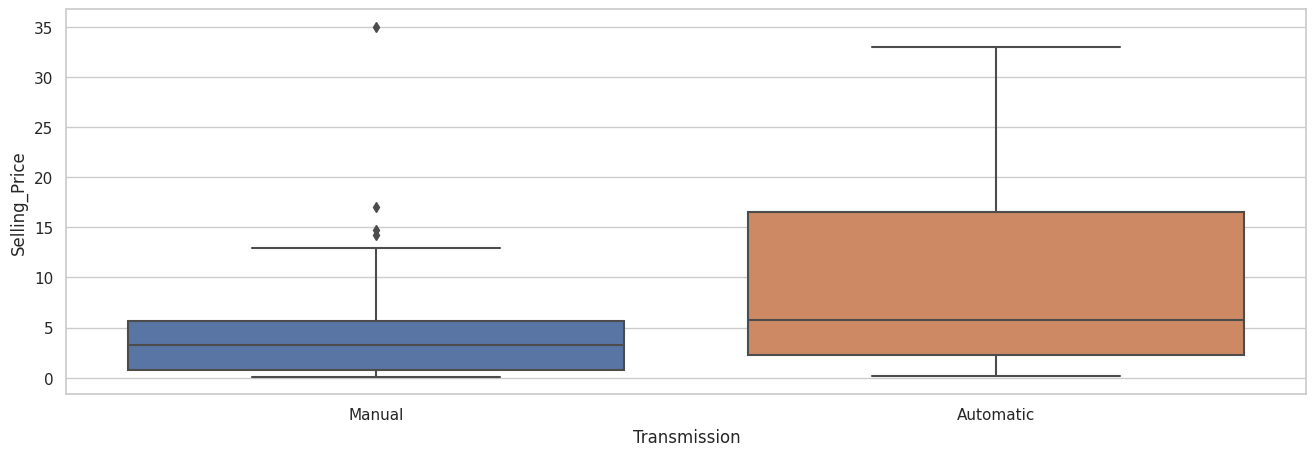

In [ ]:
# Draw a vertical boxplot grouped
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Selling_Price', x = 'Transmission', data = df)

MODEL BULIDING

In [ ]:
# labelencoder
# let's import the labelencoder to convert categorical into numerical data
from sklearn.preprocessing import LabelEncoder,StandardScaler
label=LabelEncoder()
df['Car_Name']=label.fit_transform(df['Car_Name'])
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df['Selling_type']=label.fit_transform(df['Selling_type'])
df['Transmission']=label.fit_transform(df['Transmission'])

In [ ]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [ ]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
# divide the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

**Linear Regression**

In [ ]:
# linear regression model
linear=LinearRegression()
# let's fit the train data
linear.fit(X_train,y_train)
# prediction of the test data
linear_pred=linear.predict(X_test)

In [ ]:
# check the test score and train score to the LinearRegression algorithm
print(f'the test_accuracy: {linear.score(X_test,y_test)*100: .2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

the test_accuracy:  87.50
The Train_accuracy: 87.75


In [ ]:
import numpy as np
#Linear regression mean_squared_error and r2_score
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 1.8531
R2_score LinearRegression 0.875005
mean_absolute_error LinearRegression 1.233813


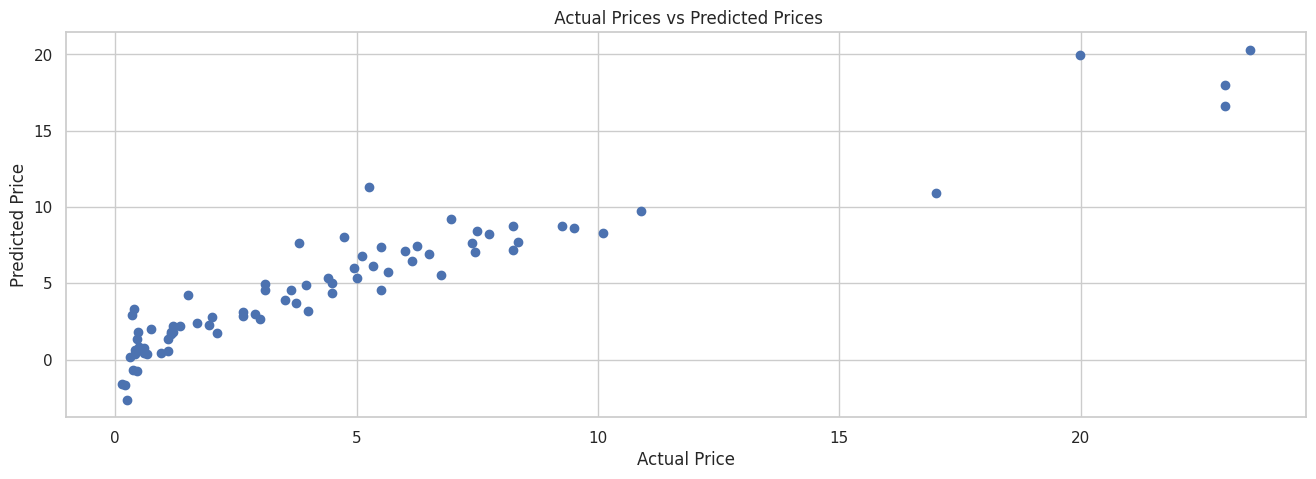

In [ ]:
plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**DecisionTree Regression**

In [ ]:
#Install the decisiontreeregressor from sklearn
from sklearn.tree import DecisionTreeRegressor
#install the model
tree=DecisionTreeRegressor(random_state=0)
#and fit the train data to the model
tree.fit(X_train,y_train)
#Prediction of the test dataset
tree_pred=tree.predict(X_test)

In [ ]:
#Check the test score and train score to the DecisionTreeRegressor algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.04
The Train_accuracy: 100.00


In [ ]:
#DecisionTreeRegressor mean_squared_error , r2_score
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 1.0429
R2_score DecisionTreeRegressor 0.960416
mean_absolute_error DecisionTreeRegressor 0.641053


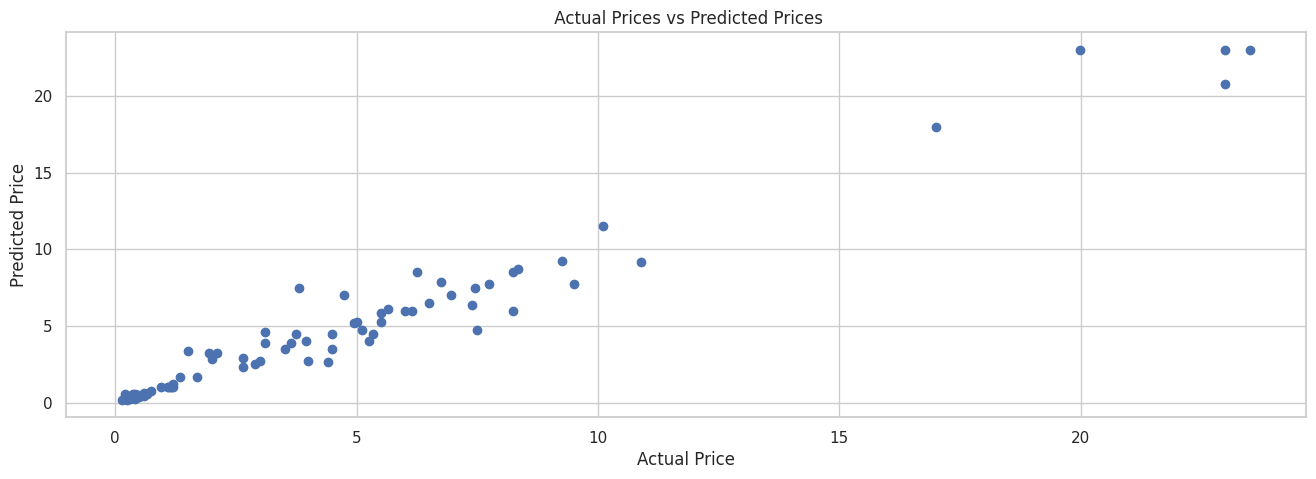

In [ ]:
plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**RandomForest Regression**

In [ ]:
#Install the RandomForestRegressor model to the sklearn
from sklearn.ensemble import RandomForestRegressor
#install the RandomForestRegressor
random=RandomForestRegressor()
#Let's fit the train data to the model
random.fit(X_train,y_train)
#Prediction to the test dataset
random_pred=random.predict(X_test)

In [ ]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 96.99
The Train_accuracy: 98.31


In [ ]:
#RandomForestRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random_pred)))

Root_mean_squred_error RandomForestRegressor 0.9094
R2_score RandomForestRegressor 0.969898
mean_absolute_error RandomForestRegressor 0.566497


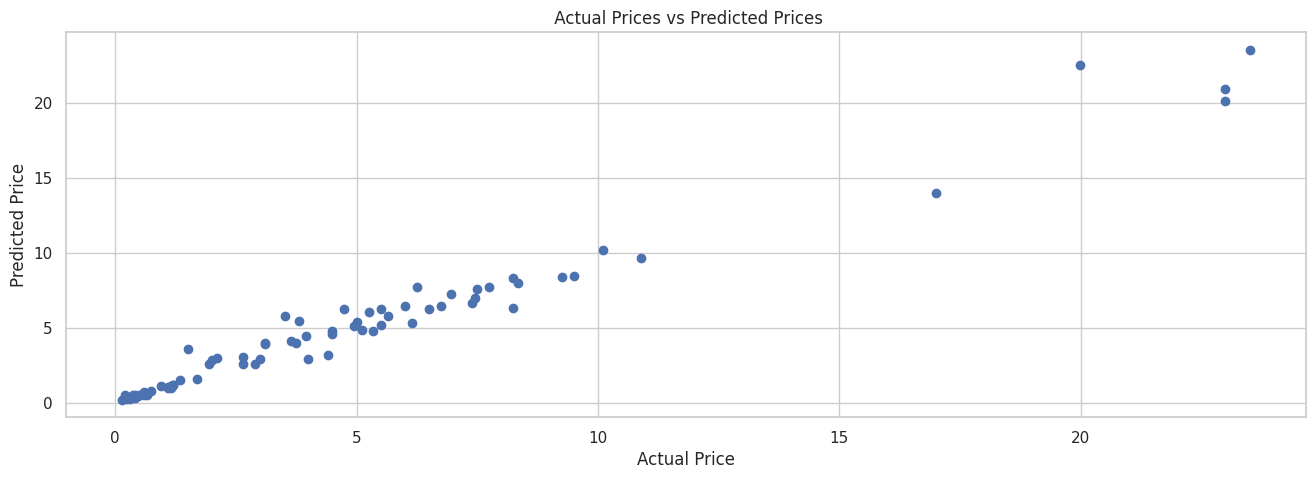

In [ ]:
plt.scatter(y_test, random_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**XGB Regression**

In [ ]:
#Install the XGBRegressor from the xgboost
from xgboost import XGBRegressor
#Install the XGBRegressor
xgb=XGBRegressor()
#And fit the train data to the model
xgb.fit(X_train,y_train)
#Prediction of the XGBRegressor
xgb_pred=xgb.predict(X_test)

In [ ]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 97.25
The Train_accuracy: 100.00


In [ ]:
#XGBRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error XGBRegressor {:.4f}".format(rmse))
print("R2_score XGBRegressor {:4f}".format(r2_score(y_test,xgb_pred)))
print("mean_absolute_error XGBRegressor {:4f}".format(mean_absolute_error(y_test,xgb_pred)))

Root_mean_squred_error XGBRegressor 0.8698
R2_score XGBRegressor 0.972461
mean_absolute_error XGBRegressor 0.529474


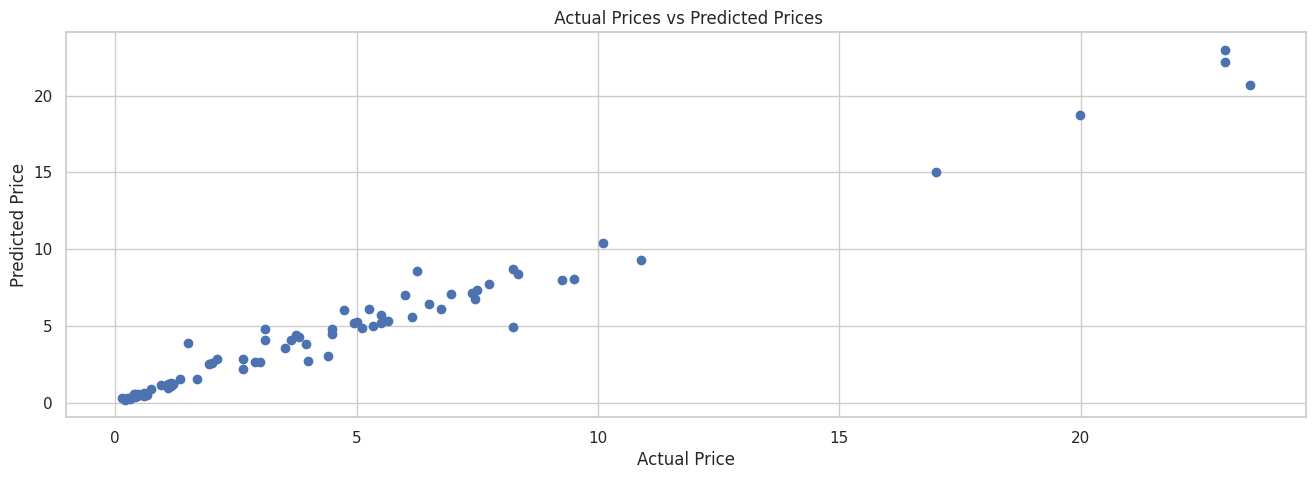

In [ ]:
plt.scatter(y_test, xgb_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()